<a href="https://colab.research.google.com/github/jayantc14/Yelp_Data_Analysis/blob/main/yelp_Sentiment_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/yelp_dataset/yelp_3cities_refined.csv")

In [ ]:
mydata = df

In [ ]:
# Define a function to clean the text
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['text'].apply(clean)
mydata.head()

,business_id,user_id,review_stars,useful_x,text,date,Cleaned Reviews
0,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...,2019-01-22 00:53:22,Wow the best sandwich I ve had in a very long ...
1,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...,2019-06-22 05:00:12,Everything from the food to the drinks to the ...
2,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...,2020-03-08 19:55:43,Absolutely delicious coffee in rapidly changin...
3,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...,2020-03-14 18:24:31,The owner and staff are incredibly sweet and k...
4,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...,2020-12-03 02:47:14,Such a tasty burrito and the salas are tasty D...


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,business_id,user_id,review_stars,useful_x,text,date,Cleaned Reviews,POS tagged
0,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...,2019-01-22 00:53:22,Wow the best sandwich I ve had in a very long ...,"[(Wow, None), (best, a), (sandwich, n), (long,..."
1,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...,2019-06-22 05:00:12,Everything from the food to the drinks to the ...,"[(Everything, n), (food, n), (drinks, n), (ser..."
2,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...,2020-03-08 19:55:43,Absolutely delicious coffee in rapidly changin...,"[(Absolutely, r), (delicious, a), (coffee, n),..."
3,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...,2020-03-14 18:24:31,The owner and staff are incredibly sweet and k...,"[(owner, n), (staff, n), (incredibly, r), (swe..."
4,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...,2020-12-03 02:47:14,Such a tasty burrito and the salas are tasty D...,"[(tasty, a), (burrito, n), (salas, n), (tasty,..."


**Text Blob**

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,business_id,user_id,review_stars,useful_x,text,date,Cleaned Reviews,POS tagged,Lemma
0,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...,2019-01-22 00:53:22,Wow the best sandwich I ve had in a very long ...,"[(Wow, None), (best, a), (sandwich, n), (long,...",Wow best sandwich long time unbelievably goo...
1,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...,2019-06-22 05:00:12,Everything from the food to the drinks to the ...,"[(Everything, n), (food, n), (drinks, n), (ser...",Everything food drink service exceptional Wo...
2,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...,2020-03-08 19:55:43,Absolutely delicious coffee in rapidly changin...,"[(Absolutely, r), (delicious, a), (coffee, n),...",Absolutely delicious coffee rapidly change i...
3,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...,2020-03-14 18:24:31,The owner and staff are incredibly sweet and k...,"[(owner, n), (staff, n), (incredibly, r), (swe...",owner staff incredibly sweet knowledgeable F...
4,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...,2020-12-03 02:47:14,Such a tasty burrito and the salas are tasty D...,"[(tasty, a), (burrito, n), (salas, n), (tasty,...",tasty burrito salas tasty love guac vegetari...


In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(mydata[['text', 'Lemma']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis
0,Wow- the best sandwich I've had in a very long...,Wow best sandwich long time unbelievably goo...,0.443929,Positive
1,Everything from the food to the drinks to the ...,Everything food drink service exceptional Wo...,0.191667,Positive
2,Absolutely delicious coffee in rapidly changin...,Absolutely delicious coffee rapidly change i...,0.620833,Positive
3,The owner and staff are incredibly sweet and k...,owner staff incredibly sweet knowledgeable F...,0.370000,Positive
4,Such a tasty burrito and the salas are tasty. ...,tasty burrito salas tasty love guac vegetari...,0.500000,Positive


In [ ]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Positive    175134
Negative     20912
Neutral       1903
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7faa32e94f90>,
 [Text(-1.0286742102160296, 0.3896528830079767, 'Positive'),
  Text(1.0164385794204134, -0.42053848131391275, 'Negative'),
  Text(1.349384337092229, -0.04076654032617705, 'Neutral')],
 [Text(-0.561095023754198, 0.21253793618616906, '88.5%'),
  Text(0.5544210433202255, -0.2293846261712251, '10.6%'),
  Text(0.8496123603914033, -0.025667821686852214, '1.0%')])

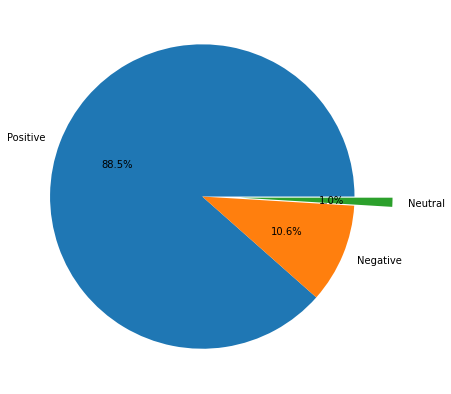

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

**Vader**

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 32.2 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Wow- the best sandwich I've had in a very long...,Wow best sandwich long time unbelievably goo...,0.443929,Positive,0.9780,Positive
1,Everything from the food to the drinks to the ...,Everything food drink service exceptional Wo...,0.191667,Positive,0.6590,Positive
2,Absolutely delicious coffee in rapidly changin...,Absolutely delicious coffee rapidly change i...,0.620833,Positive,0.9509,Positive
3,The owner and staff are incredibly sweet and k...,owner staff incredibly sweet knowledgeable F...,0.370000,Positive,0.9388,Positive
4,Such a tasty burrito and the salas are tasty. ...,tasty burrito salas tasty love guac vegetari...,0.500000,Positive,0.6369,Positive


In [ ]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    167680
Neutral      21133
Negative      9136
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7faa33071290>,
 [Text(-1.0641772486705237, 0.5545509745839733, 'Positive'),
  Text(0.891811062170359, -0.643951107919364, 'Neutral'),
  Text(1.0884572844423201, -0.15893627636398952, 'Negative')],
 [Text(-0.6207700617244721, 0.32348806850731776, '84.7%'),
  Text(0.48644239754746843, -0.3512460588651076, '10.7%'),
  Text(0.5937039733321745, -0.08669251438035791, '4.6%')])

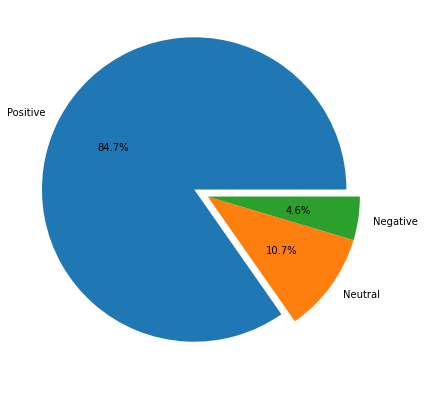

In [ ]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

**Senti Wordnet**

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = mydata['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Wow- the best sandwich I've had in a very long...,Wow best sandwich long time unbelievably goo...,0.443929,Positive,0.9780,Positive,Positive
1,Everything from the food to the drinks to the ...,Everything food drink service exceptional Wo...,0.191667,Positive,0.6590,Positive,Positive
2,Absolutely delicious coffee in rapidly changin...,Absolutely delicious coffee rapidly change i...,0.620833,Positive,0.9509,Positive,Positive
3,The owner and staff are incredibly sweet and k...,owner staff incredibly sweet knowledgeable F...,0.370000,Positive,0.9388,Positive,Positive
4,Such a tasty burrito and the salas are tasty. ...,tasty burrito salas tasty love guac vegetari...,0.500000,Positive,0.6369,Positive,Positive


In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    161129
Negative     31798
Neutral       4965
0               57
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7faa24b89ad0>,
 [Text(-0.9174719796670343, 0.6068320744043224, 'Positive'),
  Text(0.8662444113133195, -0.6779532578787718, 'Negative'),
  Text(1.0964282855978111, -0.08857208669239393, 'Neutral'),
  Text(1.099999549933517, -0.0009950608325736544, '0')],
 [Text(-0.500439261636564, 0.33099931331144855, '81.4%'),
  Text(0.47249695162544697, -0.3697926861156937, '16.1%'),
  Text(0.5980517921442605, -0.04831204728676032, '2.5%'),
  Text(0.599999754509191, -0.0005427604541310842, '0.0%')])

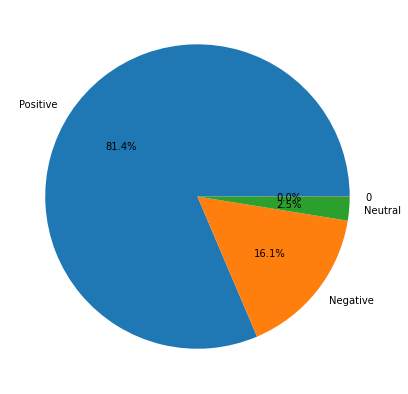

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)

**Visual representation of TextBlob, VADER, SentiWordNet results**

([<matplotlib.patches.Wedge at 0x7faa2479fcd0>,
 [Text(-0.9174719796670343, 0.6068320744043224, 'Positive'),
  Text(0.8662444113133195, -0.6779532578787718, 'Negative'),
  Text(1.0964282855978111, -0.08857208669239393, 'Neutral'),
  Text(1.099999549933517, -0.0009950608325736544, '0')],
 [Text(-0.500439261636564, 0.33099931331144855, '81.4%'),
  Text(0.47249695162544697, -0.3697926861156937, '16.1%'),
  Text(0.5980517921442605, -0.04831204728676032, '2.5%'),
  Text(0.599999754509191, -0.0005427604541310842, '0.0%')])

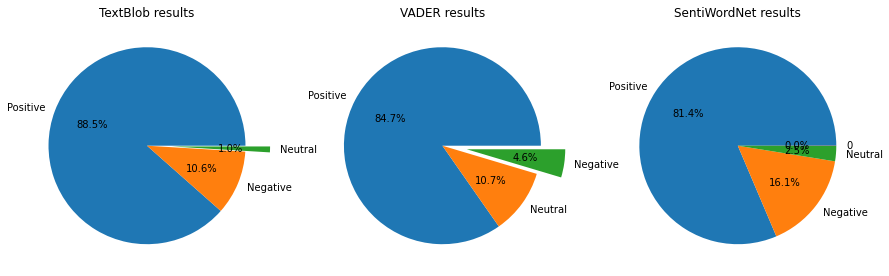

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', shadow=False)